# AISC2000 - Machine Learning 2 Module 8 Application Exercise

### Group Members:
### Charitha Priya Dongari – 500191110
### Katterapalli Venkata Satya Narayana – 500190693
### Rumana Baanu Iliyas Ahmed – 500186725
### Rohan Bhatt – 500187633
### Shivam Jolly - 500196452

In [1]:
#importing the required libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
dt = pd.read_csv("creditcard.csv")  #Loading the dataset

In [3]:
dt.shape #Displaying the shape of the dataset 

(284807, 31)

In [4]:
dt.head(20) #Displaying the top 20 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
dt.info()  #Information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### We can see that, there are multiple numerical variables in our dataset.

In [6]:
dt.isnull().sum() #Checking whether there are any null values are present or not

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There is no null value in our dataset.

In [7]:
dt.columns #Displaying columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Question 1

### 1a.	Study the dataset, identify the independent and target variables. 

#### If we observe the dataset, the  target variable is Class which has the fraud detection as 1 and no fraud detection as 0.

#### The rest of the variables are considered as independent variables.
#### The independent variables are ==> "Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24","V25", "V26", "V27", "V28", "Amonunt"

In [8]:
independent = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 
     'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
     'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] #independent Variables

In [9]:
target = 'Class' #Target Varibale

### 1b. Specify the type of dataset (balanced/imbalanced) and visualize the distribution of the target variable. Alternatively, you can calculate the percentage of each class.

In [10]:
dt.Class.value_counts() #counting the values of fraud and no fraud

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

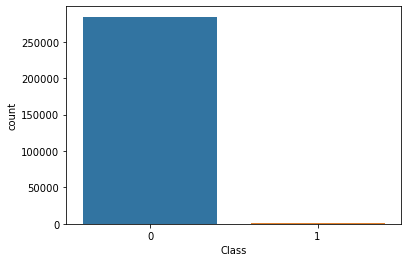

In [11]:
sns.countplot(x="Class", data=dt) #Countplot for the Fraud and Non-Fraud data

In [12]:
a=np.arange(1,284808) #setting the index

Text(0.5, 0, 'Class')

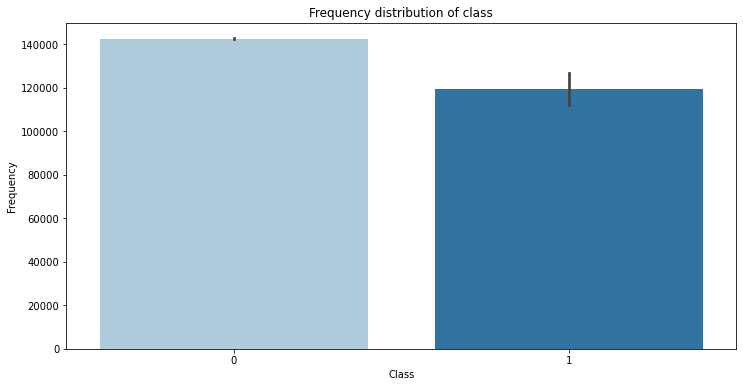

In [13]:
ax=plt.figure(figsize=(12,6))
sns.barplot(x='Class',y=a,data=dt,palette='Paired')
plt.title('Frequency distribution of class')
plt.ylabel('Frequency')
plt.xlabel('Class')

#### From all the above observations, we can see that there are more fraudulent data than non-fraudulent data.
#### Hence, we can say that the data is highly imbalanced. 

### Calculating the percentage of different class values just for observation.

In [14]:
percentage_of_fraud = (dt.Class.value_counts()[1]/dt.Class.count())*100   #Calculating the percentage of the Fraud data
print(percentage_of_fraud)

0.1727485630620034


In [15]:
percentage_of_nonfraud = (dt.Class.value_counts()[0]/dt.Class.count())*100
print(percentage_of_nonfraud)   #Calculating the percentage of the Non - Fraud data

99.82725143693798


### 1c. Break down the dataset into training (70%) and testing (30%) groups and make sure these two groups do not share any common data point.


In [16]:
X = dt[independent] ## Partitioning the dataset into 2 sets, this one is for independent variables

In [17]:
y = dt[target] ## This object is dependent variables.

In [18]:
from sklearn.model_selection import train_test_split #importing all the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state =13) #Splitting the data of 70% and 30%

In [19]:
#Checking the size of the train and test data
print("Train Feature size : ",len(X_train))
print("Train Label size   :",len(y_train))
print("Test Feature size  :",len(X_test))
print("Test Label size    :",len(y_test))

Train Feature size :  199364
Train Label size   : 199364
Test Feature size  : 85443
Test Label size    : 85443


In [20]:
y_test  #Displaying the y_test data

195245    0
81682     0
48923     0
146316    0
161047    0
         ..
73308     0
81364     0
241773    0
171394    0
215305    0
Name: Class, Length: 85443, dtype: int64

### 1d.	Then, fit a classifier of your choice on the training data using the target and independent variables. Properly, comment on the output. 

In [21]:
model = RandomForestClassifier()
model.fit(X_train,y_train)   #Fitting the Randomclassifier to the train data

RandomForestClassifier()

### Metrics

### 1e. Predict the target variable using appropriate function on the testing group and comment on the output.

In [22]:
y_prediction = model.predict(X_test)
type(y_prediction)
y_prediction                   #Predicting the data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_prediction)
print(confusion_matrix)       #Confusion matrix of y_test and y_Prediction

[[85304     3]
 [   34   102]]


In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_prediction)*100
print("Accuracy = {:.2f}%".format(accuracy))   #Accuracy score of the predicted data

Accuracy = 99.96%


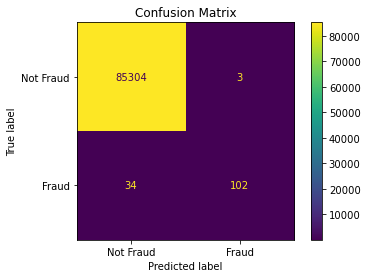

In [25]:
c_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                display_labels=["Not Fraud","Fraud"])
c_matrix.plot()
plt.title("Confusion Matrix")
plt.show()                                     #Plotting the confusion matrix graph.

In [26]:
#Displaying the Classification report of the y_test and predicted data
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_prediction)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.97      0.75      0.85       136

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



#### Our data has good accuracy. Moreover the precision and recall values of class 0 is 1, whereas the precision value of class 1 is 0.98, and recall is 0.74.That means only 74% of the fraud data is predicted correctly out of all the actual data for class 1.

### 1f.	Do you see any problem with these steps? If yes, what is the problem and why does it affect the results?  

#### Even though we noticed the data is highly imbalanced, we continued working on the procedure, so we get an accuracy of 1, which is an issue in itself. As majority of the dataset is based on class 0 values, the model gives better results, but it undermines the possibilities of class 1 values. Hence, the model created will predict wrongly when encounter any new case for class 1 value.

## Question 2


### 2a.	Break down the dataset into training (70%) and testing (30%) groups and make sure these two groups do not share any common data point. 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state =13)

### 2b. Use one of the resampling strategies to balance the dataset if needed e.g., oversampling, SMOTE, etc. Please note you only perform resampling on the training set. 

In [29]:
#Oversampling with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

#Summarizing class distribution
counter = Counter(y_train)
print("Original data = ", counter)   #Printing the original data


Original data =  Counter({0: 199008, 1: 356})


In [30]:
#Loading the SMOTE
over = SMOTE()
#Transforming the dataset
Xs_train, ys_train = over.fit_resample(X_train, y_train)
#Summarizing the new class distribution
counter = Counter(ys_train)
print("Oversampled data = ", counter)   #printing the count after oversampling the data

Oversampled data =  Counter({0: 199008, 1: 199008})


### 2c. Then, use the same classifier as (1) on the training data. Properly, comment on the output.

In [31]:
model_2 = RandomForestClassifier(random_state=13)   #Fitting the Randomclassifier to the train data

In [32]:
model_2.fit(Xs_train,ys_train) #fitting the data 

RandomForestClassifier(random_state=13)

### 2d. Predict the target variable using the testing set and comment on the output.

In [33]:
ys_pred = model_2.predict(X_test)
ys_pred               #Predicting the data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
ys_pred = pd.Series(ys_pred, name ='ys_pred')

In [35]:
y_test

195245    0
81682     0
48923     0
146316    0
161047    0
         ..
73308     0
81364     0
241773    0
171394    0
215305    0
Name: Class, Length: 85443, dtype: int64

In [36]:
from sklearn.metrics import confusion_matrix
cm_smote = confusion_matrix(y_test, ys_pred)
print(cm_smote)    #Confusion matrix of y_test and ys_Pred

[[85294    13]
 [   24   112]]


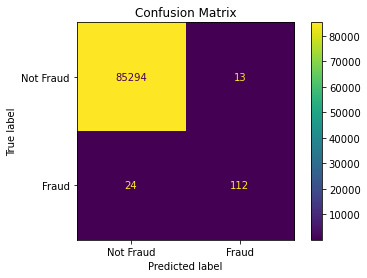

In [37]:
c_matrix_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote,
                                display_labels=["Not Fraud","Fraud"])
c_matrix_smote.plot()
plt.title("Confusion Matrix")
plt.show()       #Plotting the confusion matrix graph.

In [38]:
## Printing the negatives and positives for both the classes.
print(f"True_negatives = {cm_smote[0,0]}")
print(f"False_positives = {cm_smote[0,1]}")      
print(f"False_negatives = {cm_smote[1,0]}")
print(f"True_positives = {cm_smote[1,1]}")

True_negatives = 85294
False_positives = 13
False_negatives = 24
True_positives = 112


In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,ys_pred)*100
print("Accuracy = {:.2f}%".format(accuracy)) #printing the accuracy score of the oversampled data

Accuracy = 99.96%


In [40]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, ys_pred)
print(classification_report)                    #Classification report of the oversampled data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.90      0.82      0.86       136

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#### Our data has good accuracy. Moreover the precision and recall values of class 0 is 1, whereas the precision value of class 1 is 0.90, and recall is 0.82.That means only 82% of the fraud data is predicted correctly out of all the actual data for class 1. 

### 2e.	Analyze and compare the performance of the model based on the classification performance metrics in (1) and (2). Which metric would you suggest to use and why?  

#### The first model we have made in (1) has a high variance and a little bit of bias too as it is made on the bases of an imbalanced dataset which we can see on the precision and recall values of the dataset. In this assignment, our focus is to currectly predict the class 1 values and for this purpose we are going to choose some model 2 we have created after rectifying the imbalance issue and we can say that by comparing the recall values of both the models. The recall value for class 1 in model 1 is lesser as compared to model 2. we can further conclude that model 2 is better than model 1 on the bases of f1 score too as it combines both precision and recall for evaluation. Hence we are choosing recall and f1 score for selecting the best model.